<a id="cont"></a>

## Table of Contents

<a href=#one>1. Introduction</a>

<a href=#two>2. Importing Packages</a>

<a href=#three>3. Loading Data</a>

<a href=#four>4. Exploratory Data Analysis (EDA)</a>

<a href=#five>5. Data Engineering</a>

<a href=#six>6. Modeling</a>

<a href=#seven>7. Model Performance</a>

<a href=#eight>8. Model Explanations</a>

 <a id="one"></a>
## 1. Introduction
<a href=#cont>Back to Table of Contents</a>

**Project Overview**

After decades receiving little attention from non-scientists, the impacts of climate change are now widely discussed through a variety of mediums. Originating from scientific papers, newspaper articles, and blog posts, a broad spectrum of climate change opinions, subjects, and sentiments exist. Newspaper articles often dismiss or sensationalize the effects of climate change due to journalistic biases including personalization, dramatization and a need for novelty. Scientific papers portray a much more realistic and consensus view of climate change. These views, however, do not receive widespread media attention due to several factors including journal paywalls, formal scientific language, and technical results that are not easy for the general public to understand. 

In the last decade, there has been a shift from the consumption of traditional mass media (newspapers and broadcast television) to the consumption of social media (blog posts, Twitter, etc.). This shift represents a switch in communications from “one-to-many” to “many-to-many”. Rather than a single journalist or scientist telling the public exactly what to think, social media offers a mechanism for many people of diverse backgrounds to communicate and form their own opinions. Exposure is a key aspect in transforming a social problem into a public issue, and social media is a potential avenue where climate change issues can be initially exposed.

In this project, we analyze a dataset that aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, we have 43943 tweets.

In [ ]:
pip install emoji

     |████████████████████████████████| 175 kB 4.2 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=aaca39d21daf4b01c9b59630fc7feaf1797d86f538cc23d996f4530a7dc737d6
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


In [ ]:
pip install contractions

     |████████████████████████████████| 106 kB 4.4 MB/s 
     |████████████████████████████████| 287 kB 29.7 MB/s 


In [ ]:
pip install comet_ml

     |████████████████████████████████| 342 kB 4.2 MB/s 
     |████████████████████████████████| 54 kB 2.3 MB/s 
     |████████████████████████████████| 54 kB 1.8 MB/s 
     |████████████████████████████████| 551 kB 38.6 MB/s 
  Created wheel for configobj: filename=configobj-5.0.6-py3-none-any.whl size=34547 sha256=348264b4f78f111e5c6ae381b25777059e834222e8a0d7b9ed493920c175b69f
  Stored in directory: /root/.cache/pip/wheels/0d/c4/19/13d74440f2a571841db6b6e0a273694327498884dafb9cf978
Successfully built configobj


**Problem Statement**
Build a model that is able to classify a person's sentiment towards climate change based on their novel tweet data.


 <a id="two"></a>
## 2. Importing Packages
<a href=#cont>Back to Table of Contents</a>

In [116]:
# Libraries for data loading, data manipulation and data visulisation
import re
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from bs4 import BeautifulSoup
import requests
from requests.packages.urllib3.exceptions import InsecureRequestWarning
requests.packages.urllib3.disable_warnings(InsecureRequestWarning)
%matplotlib inline
# set plot style
sns.set()
# Libraries for Natural Language processing
import nltk
from nltk.corpus import stopwords
import contractions
import unicodedata
import emoji
# from gensim.parsing.preprocessing import STOPWORDS
# from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, PorterStemmer
from nltk.tokenize import TreebankWordTokenizer
import pickle

# Libraries for data preparation and model building
from sklearn import preprocessing
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, classification_report, precision_score, recall_score
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from comet_ml import Experiment
from sklearn.pipeline import Pipeline
import pickle
import zipfile
# Setting global constants to ensure notebook results are reproducible
SEED = 1

In [118]:
# nltk.download('averaged_perceptron_tagger')
# nltk.download('wordnet')
# nltk.download('stopwords')

## Start experiment on comet, to log metrics

In [3]:
experiment = Experiment(
    api_key="cbtJsKjDivb61gTUBXpeo48r7",
    project_name="classification-predict-streamlit-group3",
    workspace="michael-py",
)

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/michael-py/classification-predict-streamlit-group3/d06a30b467194b0d9d5b47024ecd8f39

COMET ERROR: Error logging git-related information


<a id="two"></a>
## 3. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [119]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

<a id="three"></a>
## 4. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In this section, we try to uncover the underlying patterns and summarize the dataset's primary characteristics. in addition to what we learn from modeling and hypothesis testing. In this section is where we determine if the data has missing vaues, if there are any duplicated values and also what kind of machine learning algorithm can be built from the dataset.

In [5]:
# view the first 5 rows of the dataset
df.head()

sentiment                                            message  tweetid
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221
1          1  It's not like we lack evidence of anthropogeni...   126103
2          2  RT @RawStory: Researchers say we have three ye...   698562
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954

In [6]:
# Check for the dimension of the data using the pandas shape method
df.shape

(15819, 3)

As can be seen from the first five rows of the data, there are __3__ columns named `sentiment`, `message` and `tweetid`. A further investigation also shows that the dataset has **15,819** observations and 3 columns as revealed earlier from the `.head()` method. We could also see that of these 3 columns 2 are in numerical format, while one of them is in text form.

Next let's check how many of the data points do not contain any data? and what kind of data is contained in each column? although we could clearly see the datatype from just looking at the data,it can further be checked by looking at the information of the dataset provided by the `.info()` method.

In [7]:
# check for empty or missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


The information above tells us that all of the columns in our dataset contain __15,819__ rows of data that are `non-null`, meaning we have no missing values in our dataset. This can be attested to by the information provided when we looked at the `shape` of the data above

Another interesting information to extract from this dataset will be the unique labels in the `sentiment` which is our `label` or `dependent variable`

In [8]:
sentiment_labels = list(df.sentiment.unique())
print(sentiment_labels)

[1, 2, 0, -1]


We have __4__ different labels which make up the list of all possible sentiments that can be predicted by our model(s)

__-1__: means it is a **NEGATIVE** sentiment

__0__: means it is a **NEUTRAL** sentiment

__1__: means it is a **POSITIVE** sentiment

__2__: means it is a **FACTUAL** sentiment from a reputable News Site

What are the proportions of our dataset that these labels represent? First, we will look at the figures and then we will look at a chart and barplot for better understanding  

In [9]:
labels_proportions = df.sentiment.value_counts()
labels_proportions

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

We can see that _label 1_ is very highly represented (__8,530__) and _label 2_ follows not so closely (__3,640__), which can be a good thing because it indicates that a lot of people are speaking about climate change and are aware of its impacts on our planet. _Label 0_ comes in third (__2,353__); these tweets are neutral, having no connections with climate change or its woes.

Gladly, the negative sentiments come in tops from the bottom (__1,296__). These are tweets from people that do not believe in the reality of climate change or global warming

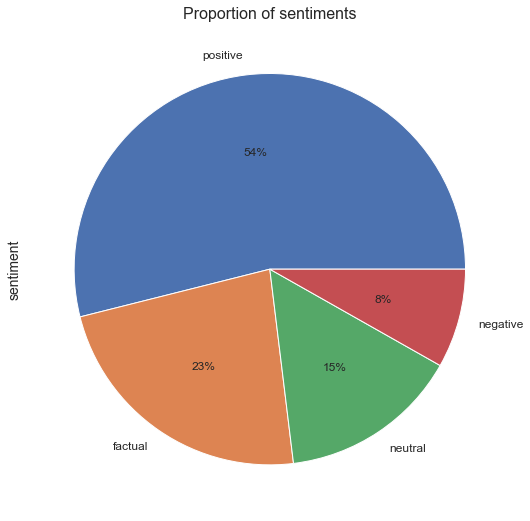

In [10]:
def plot_series(series, kind='pie', name='sentiment'):
    import matplotlib as mpl
    mpl.rcParams['xtick.labelsize'] = 12 
    series.index = ['positive', 'factual', 'neutral', 'negative']
    series.plot(kind=kind, figsize=(12, 9), autopct = '%1.0f%%')
    plt.ylabel(name, fontsize=14)
    plt.xticks(rotation=0)
    plt.title(f'Proportion of {name}s', fontsize=16)
    return
plot_series(df.sentiment.value_counts(), name='sentiment')

Here we see that the biggest slice of the pie represents the _positive comments_ followed by the _factual comments/posts_ and so on, confirming what we understand from the figures. This is further demonstrated in the barplot below.

Now the chart.

Text(0.5, 1.0, 'Class Distributions')

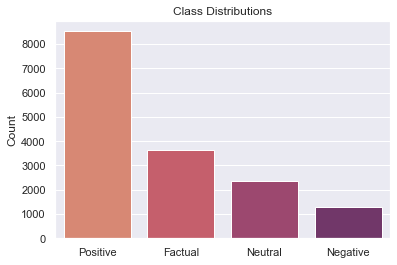

In [11]:
class_distribution = pd.DataFrame(list(df['sentiment'].value_counts()),
                          index=['Positive', 'Factual', 'Neutral', 'Negative'],
                          columns=['Count'])
sns.set()
sns.barplot(x=class_distribution.index, y=class_distribution.Count, 
           palette="flare")
plt.title('Class Distributions')

While we are glad that there are more _positive_ comments than the _neutral_ and _negative_ ones combined, this poses an issue when we try to feed the data into our machine learning algorithm. This is as a result of an __imbalance__ of the proportion of data represented by the labels in our dataset. We will dive into that further in the **data engineering** section; what data imbalance is and how to deal with it.

Out of curiosity, While it is intuitive to spot a _postive_ or a _negative_ or a _neutral_ comment, what makes a comment *factual*? hmm..

Let's look further into the data and see what we find.

We will approach this by printing a sample of messages in these different comment categories and see if we can make sense of what we find.

In [120]:
# name variable for positive tweets
positives = df['message'][df['sentiment'] == 1]
# name variable for negative tweets
negatives = df['message'][df['sentiment'] == -1]
# name variable for neutral tweets
neutrals = df['message'][df['sentiment'] == 0]
# name variable for factual tweets
factuals = df['message'][df['sentiment'] == 2]

# take a sneak peak of text contained in each sentiment
print("Positive comments:")
print(f"\t{np.array(positives[:5])}\n")
print("Negative comments:")
print(f"\t{np.array(negatives[:5])}\n")
print("Neutral comments:")
print(f"\t{np.array(neutrals[:5])}\n")
print("Factual comments:")
print(f"\t{np.array(factuals[:5])}\n")

Positive comments:
	["PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable"
 "It's not like we lack evidence of anthropogenic global warming"
 '#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD'
 "RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight"
 "Worth a read whether you do or don't believe in climate change https://t.co/ggLZVNYjun https://t.co/7AFE2mAH8j"]

Negative comments:
	['Sally Kohn’s latest evidence of climate change proves she is ‘not a smart person’ https://t.co/MhkzoGL9Vt via @twitchyteam Need we say more'
 "@realDonaldTrump Carbon Tax is a Globalist idea to enslave the world's population. It is the whole reason for propagating global warming!"
 'RT @SteveSGoddard: We had winds close to 100 MPH in the area this afternoon. I would blame climate change, except that 

At first glance, nothing particularly stands out but looking closely, only factual comments have posts from news sites like **@RawStory** and **@latimes**. A quick research into **@tveitdal** shows that he is a grandmaster in climate change and environmental consultancy, but are we to take his words as facts? hmm.. We will dive into this further during **data engineering**. 

There are no surprises in the _negative_ comments, there's a post with Donald Trump tagged.

There also seems to be a lot of links in these posts. These have to be handled one way or another as they will become "noise" in the data set. In the meantime, let's investigate this further.

**What are the words that are more frequent in each post type**

To answer these Question, we would use a very popular plotting library for text data known as wordcloud. But first let us define functions that takes a dataframe and returns the n_largest words (most frequent n words) in each sentiment. For this part we would plot the wordcloud without applying any cleaning or stop word removal to the data  

In [14]:
def word_cloud(data, sentiment, amount, reverse):
    # Create a variable to store each sentiment
    data = data[data['sentiment'] == sentiment]
    # Instantiate countvectorizer object
    cv = CountVectorizer()
    # fit vectorizer object to data
    cv_data = cv.fit_transform(data.message)
    # sort countvectorizer dictionary
    dict_ = {k:v for k,v in sorted(cv.vocabulary_.items(),key = lambda item: item[1],reverse = reverse)}
    # Select the amount of words to see
    word_list = [word for word in dict_.keys()][:amount]
    # join words in the list to form a dataframe
    text = " ".join(word for word in word_list)
    # Instantiate wordcloud object
    word_cloud = WordCloud(collocations =False,
                          background_color = 'black',
                          width=400, 
                          height=300, 
                          contour_width=2, 
                          contour_color='steelblue')
    # generate wordcloud images
    return word_cloud.generate(text)

**plot of most frequent words in unclean data**

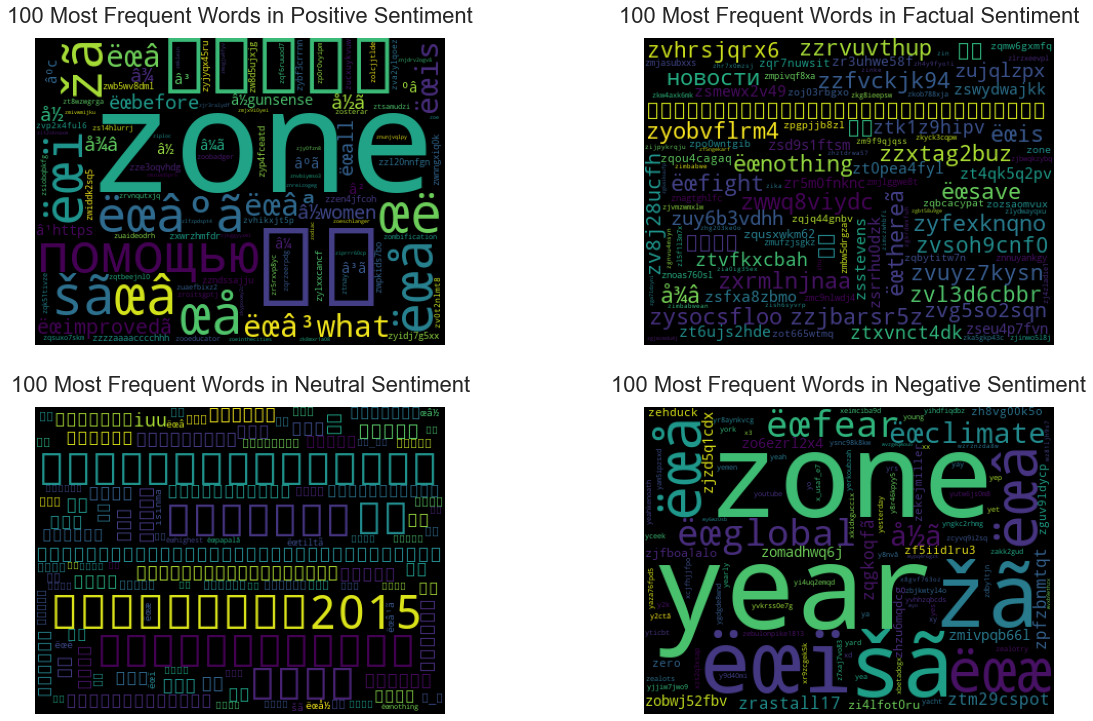

In [15]:
# Create Plot
size = df.sentiment.nunique()
amount = 100  #Change this number to reduce or increase the amount of words plotted 
sentiments = list(df.sentiment.unique())
labels = ['Positive','Factual','Neutral','Negative']
plot = list(zip(sentiments,labels))
fig = plt.figure(figsize=(20,20 * size // 3))
for index, var in enumerate(plot):
    ax = fig.add_subplot(size, 2, index + 1)
    wordcloud = word_cloud(df, var[0], amount, True) # True implies plot the most frequent n_words
    ax.imshow(wordcloud)
    plt.title('{} Most Frequent Words in {} Sentiment'.format(amount,var[1]), size = 22, pad =15)
    ax.axis('off')


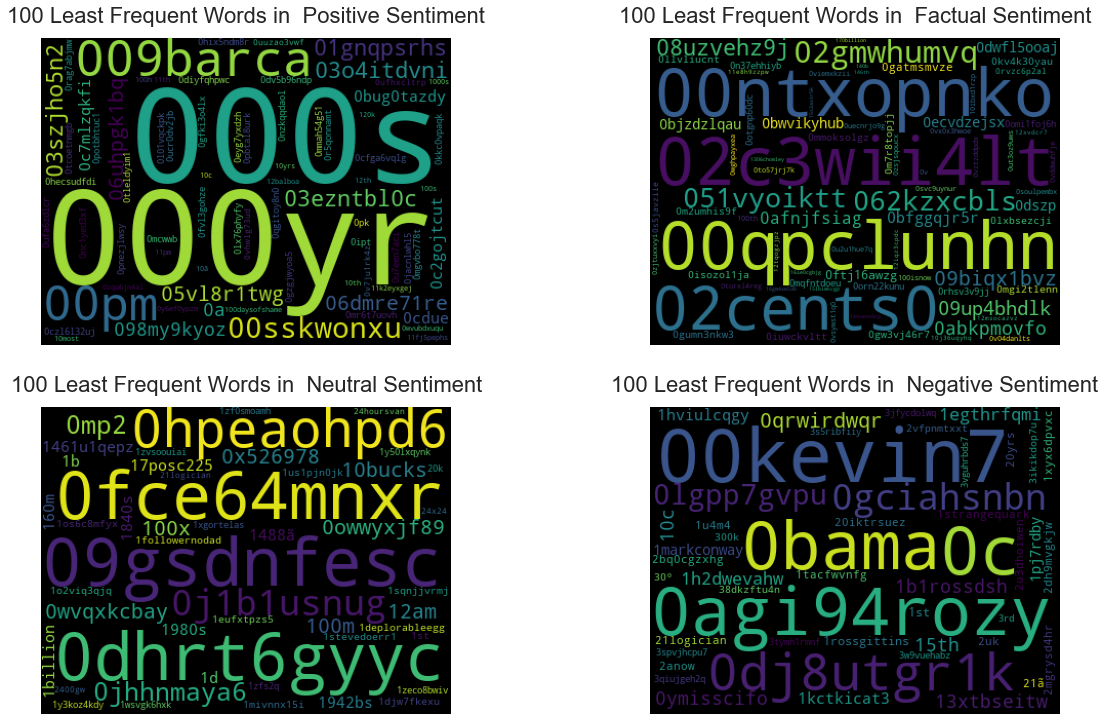

In [16]:
# Create Plot
size = df.sentiment.nunique()
amount = 100  #Change this number to reduce or increase the amount of words plotted 
sentiments = list(df.sentiment.unique())
labels = ['Positive','Factual','Neutral','Negative']
plot = list(zip(sentiments,labels))
fig = plt.figure(figsize=(20,20 * size // 3))
for index, var in enumerate(plot):
    ax = fig.add_subplot(size, 2, index + 1)
    wordcloud = word_cloud(df, var[0], amount, False) # False implies plot the least frequent n_words
    ax.imshow(wordcloud)
    plt.title('{} Least Frequent Words in  {} Sentiment'.format(amount,var[1]), size = 22, pad =15)
    ax.axis('off')


From the plots, we can see that the data contains a lot of noice and non english word characters. we also have english characters that do not necessarily form any coherent words that hve meaning, these words could be usernames or slangs used in tweeter to make tweets shorter, there are also emojis all round the corpus. some of the group of english letters present that do not make up a valid english word could be from web url links or usernames that would have gotten detached from their respective hhtp tags during tokenization of words for the word cloud plot.

Now let us apply a little regex on the data to capture and remove some of these noise, some of the transformation we would apply are

- Use the emoji module to represent each emoji as it's texxt proxy
- replace all urls in the tweet as url
- remove most non text character

**Note**

These transformation are just for plotting and visualization purposes, so we would not be mutating our dataset but making a copy of the original one for these transformations.

In [23]:
# Function to temporarily clean data for plotting
def replace_urls(text):
    word = []
    pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
    texts = re.sub(r'RT\s@\w+','retweet', text)
    texts = emoji.demojize(texts)
    for char in texts.split():
        char = re.sub(pattern_url,'web_url', char)
        char = re.sub(r'@','', char)
        char = re.sub(r'\s+$',r'',char)
        char = re.sub(r'\w\s$','',char)
        char = re.sub(r'[#,@,$_,?*//""]',r'',char)
        char = re.sub(r'(^\W+|\W+$)','',char)
        char = re.sub(r'[0-9]','',char)
        char = re.sub(r'\w\W','',char)

        word.append(char.lower())
    
    return ' '.join(word)

# make a copy of our dataset    
dp = df.copy()
# apply the replace_url function on the copied dataframe
dp['message'] = dp.message.apply(replace_urls)

**Plot most frequent words in temporarily cleaned data**

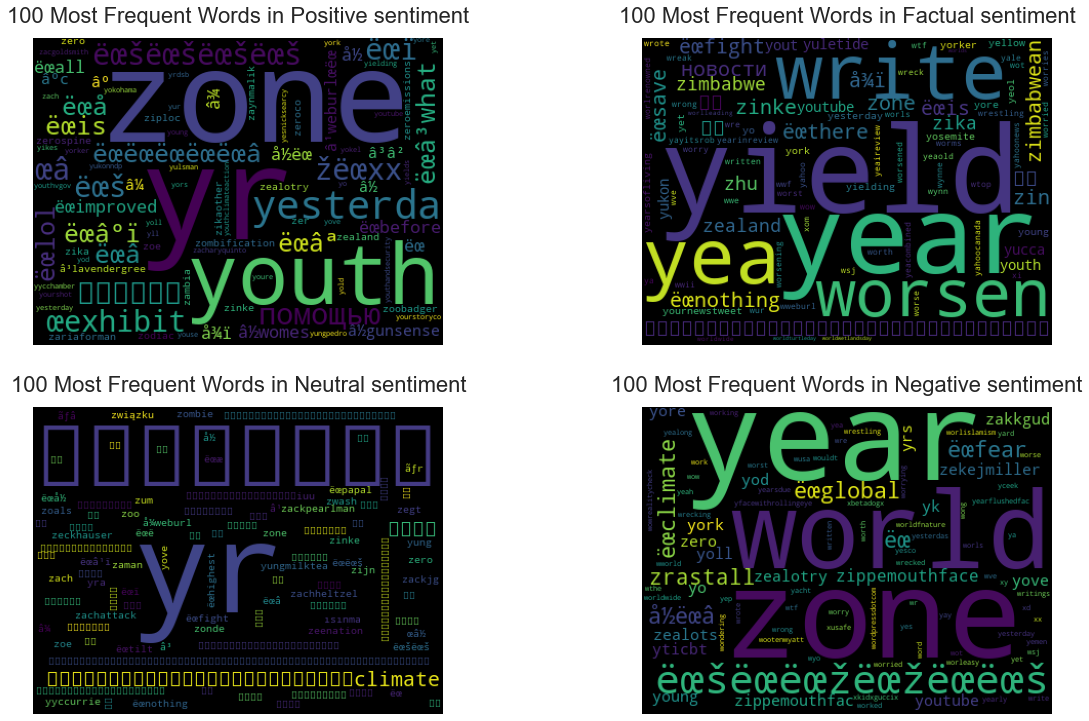

In [24]:
# Create Plot using the copied clean dataframe
size = dp.sentiment.nunique()
amount = 100  #Change this number to reduce or increase the amount of words plotted 
sentiments = list(df.sentiment.unique())
labels = ['Positive','Factual','Neutral','Negative']
plot = list(zip(sentiments,labels))
fig = plt.figure(figsize=(20,20 * size // 3))
for index, var in enumerate(plot):
    ax = fig.add_subplot(size, 2, index + 1)
    wordcloud = word_cloud(dp, var[0], amount, True) # True implies most frequent n_words
    ax.imshow(wordcloud)
    plt.title('{} Most Frequent Words in {} sentiment'.format(amount,var[1]), size = 22, pad =15)
    ax.axis('off')


**Plot least frequent words in temporarily cleaned dataframe**

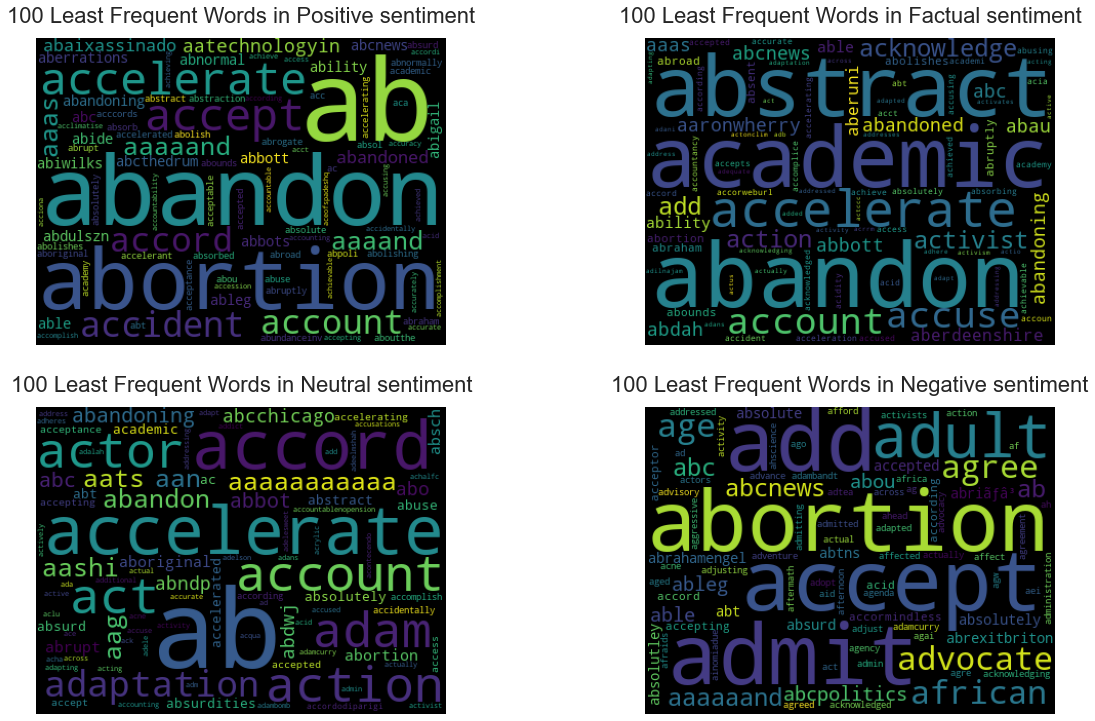

In [25]:
# Create Plot using the copied clean dataframe
size = dp.sentiment.nunique()
amount = 100  #Change this number to reduce or increase the amount of words plotted 
sentiments = list(df.sentiment.unique())
labels = ['Positive','Factual','Neutral','Negative']
plot = list(zip(sentiments,labels))
fig = plt.figure(figsize=(20,20 * size // 3))
for index, var in enumerate(plot):
    ax = fig.add_subplot(size, 2, index + 1)
    wordcloud = word_cloud(dp, var[0], amount, False) # false implies least frequent n_words
    ax.imshow(wordcloud)
    plt.title('{} Least Frequent Words in {} sentiment'.format(amount,var[1]), size = 22, pad =15)
    ax.axis('off')


Comparing the results of the plots from the clean data and the unclean data, we can see that the clean data is more coherent and hence words can be clearly read out and understood, and easily picked up by a machine learning model to learn patterns and hence make predictions.

Also, there seems to be a clash of words appearing in all 4 sentiments, words like `Abortion`, `Abandon`, `Accept`, `Zone`, `Year`,`Climate` appear frequently in almost all sentiments, this would make it quite difficult for a machine learning model to distinguish between words belonging to a particular sentiment.

Finally, let us device a method to plot words that are unique to a given sentiment from the data distribution. This can be achieved by removing all the words that are common to all classes in the data.

In [121]:
def words_freq(data, n):
    # instantiate stop words 
    stop_words = stopwords.words('english')
    # Add rt and &amp; to stop words so they dont get counted
    stop_words.extend(['rt','&amp;'])
    # instantiate dictionary to store result
    dict_ = {}
    # iterate through each word
    for row in np.array(data):
        # keep only words not in stopwords or that are not punctuations
        word_sw = ' '.join([l.lower() for l in row.split(' ') if l.lower() not in stop_words])
        word_punct = ''.join([l for l in word_sw if l not in string.punctuation])
        # iterate inside of the word_punct variable
        for wd in word_punct.split(" "):
            # add each word and it's count to the dictionary as a key value pair
            if wd in dict_:
                dict_[wd] += 1
            else:
                dict_[wd] = 1
    # sort the dictionary in descending order
    dict_ = {k: v for k,v in sorted(dict_.items(), key=lambda kv: kv[1], reverse=True)}
    # select only the n largest words from the dictionary
    n_largest = dict(list(dict_.items())[:n])
    
    return n_largest

In [122]:
pos = words_freq(positives, 60)
print(pos)

{'climate': 7328, 'change': 6873, 'global': 1592, 'warming': 1391, '': 1018, 'believe': 1000, 'trump': 877, 'going': 590, 'real': 469, 'people': 449, 'world': 443, 'us': 437, 'die': 394, 'thinking': 337, 'husband': 312, 'stephenschlegel': 307, 'httpstcosjofonã¢â‚¬â¦': 307, 'fight': 281, 'new': 281, 'like': 272, 'epa': 262, 'hoax': 252, 'sensanders': 248, 'say': 244, 'think': 234, 'need': 233, 'science': 230, 'thinks': 218, 'president': 207, 'https…': 201, 'action': 198, 'donald': 195, 'presidentelect': 192, 'right': 192, 'know': 189, 'planet': 183, 'via': 181, 'denier': 180, 'deniers': 174, 'one': 172, 'scientists': 171, 'realdonaldtrump': 164, 'stop': 164, 'still': 164, 'must': 162, 'make': 159, 'millions': 154, 'future': 154, 'tã¢â‚¬â¦': 153, 'watch': 151, 'chinese': 151, 'mr': 150, 'earth': 149, 'trumps': 147, 'take': 145, 'beforetheflood': 143, 'im': 140, 'time': 140, 'could': 137, 'would': 137}


In [123]:
neg = words_freq(negatives, 60)
print(neg)

{'climate': 781, 'change': 718, 'global': 632, 'warming': 589, '': 165, 'science': 74, 'realdonaldtrump': 68, 'us': 62, 'real': 59, 'trump': 57, 'people': 56, 'man': 52, 'would': 50, 'hoax': 50, 'scam': 49, 'made': 47, 'manmade': 46, 'data': 45, 'believe': 45, 'stevesgoddard': 44, 'make': 42, 'years': 42, 'like': 41, 'obama': 40, 'gore': 40, 'news': 35, 'al': 35, 'scientists': 35, 'money': 35, 'one': 33, 'fake': 33, 'cause': 33, 'world': 33, 'know': 32, 'tax': 31, 'chinese': 31, 'liberals': 30, 'think': 29, 'scientist': 28, 'good': 28, 'going': 28, 'left': 28, 'created': 28, 'it': 28, 'weather': 28, 'order': 27, 'leaders': 27, 'say': 26, 'due': 26, 'concept': 26, 'caused': 26, 'ice': 26, 'get': 25, 'manufacturing': 25, 'stop': 25, 'hell': 25, 'time': 24, 'manipulated': 24, 'https…': 23, 'noncompetitive': 23}


In [124]:
neu = words_freq(neutrals, 60)
print(neu)

{'climate': 1428, 'change': 1340, 'global': 1032, 'warming': 948, '': 276, 'trump': 147, 'us': 100, 'like': 96, 'real': 93, 'believe': 87, 'penguin': 84, 'think': 81, 'im': 80, 'hes': 77, 'people': 65, 'cause': 55, 'know': 52, 'one': 49, 'says': 45, 'get': 45, 'club': 44, 'new': 44, 'said': 44, 'would': 43, 'hot': 43, 'good': 39, 'world': 39, 'thing': 39, 'need': 37, 'care': 37, 'thats': 36, 'great': 36, 'right': 36, 'weather': 36, 'still': 35, 'going': 34, 'really': 34, 'want': 34, 'say': 33, 'even': 33, 'talk': 33, 'time': 32, 'much': 31, 'stop': 31, 'man': 30, 'realdonaldtrump': 30, 'hoax': 30, 'leonardo': 30, 'tell': 30, 'make': 30, 'science': 29, 'asked': 28, 'u': 28, 'today': 28, 'epa': 28, 'it': 27, 'cant': 27, 'cold': 26, 'what': 26, 'see': 26}


In [125]:
fact = words_freq(factuals, 60)
print(fact)

{'climate': 3324, 'change': 3100, 'trump': 825, '': 677, 'global': 503, 'warming': 418, 'us': 290, 'via': 286, 'says': 240, 'epa': 235, 'new': 190, 'scientists': 175, 'trumps': 165, 'donald': 162, 'fight': 158, 'china': 142, 'could': 133, 'news': 121, 'world': 113, 'scott': 112, 'paris': 110, 'chief': 100, 'energy': 100, 'president': 100, 'study': 97, 'pruitt': 96, 'science': 94, 'may': 93, 'plan': 88, 'thehill': 82, 'agreement': 79, 'carbon': 78, 'cnn': 78, 'exxon': 78, 'head': 76, 'obama': 76, 'environment': 73, 'https…': 72, 'tillerson': 71, 'house': 69, 'report': 69, 'change…': 68, 'reuters': 67, 'un': 66, 'website': 64, 'order': 64, 'back': 64, 'climatechange': 63, 'trump’s': 63, 'say': 62, 'guardian': 62, 'years': 59, 'due': 59, 'rex': 58, 'leaders': 58, 'dioxide': 56, 'white': 55, 'government': 55, 'arctic': 55, 'action': 55}


#### - *words that are unique to each tweet*

Now we could see that words like climate appear frequently throughout the whole tweets, this could be because even in a neutral tweet someone could just casually use a word like climate without necessarily supporting or debunking climate change. We want to make a word plot, where each plot contains only words thta are specific to a particular sentiment, to do this we would use set theories to first remove the common words in each sentiment such that the variables would hold only words that are specific to a sentiment.

In [126]:
# subract neutral, positive and factual tweets words from negative
Negative = list(set(neg.keys()) - set(list(fact.keys()) + list(pos.keys()) + list(neu.keys())))

# subract neutral, negative and factual tweets words from positive
Positive = list(set(pos.keys()) - set(list(fact.keys()) + list(neg.keys()) + list(neu.keys())))

# subract negative, positive and factual tweets words from neutral
Neutral = list(set(neu.keys()) - set(list(fact.keys()) + list(pos.keys()) + list(neg.keys())))

# subract neutral, positive and negative tweets words from factual
Factual = list(set(fact.keys()) - set(list(neg.keys()) + list(pos.keys()) + list(neu.keys())))


Now we define a function to help build the word cloud plot for each variable

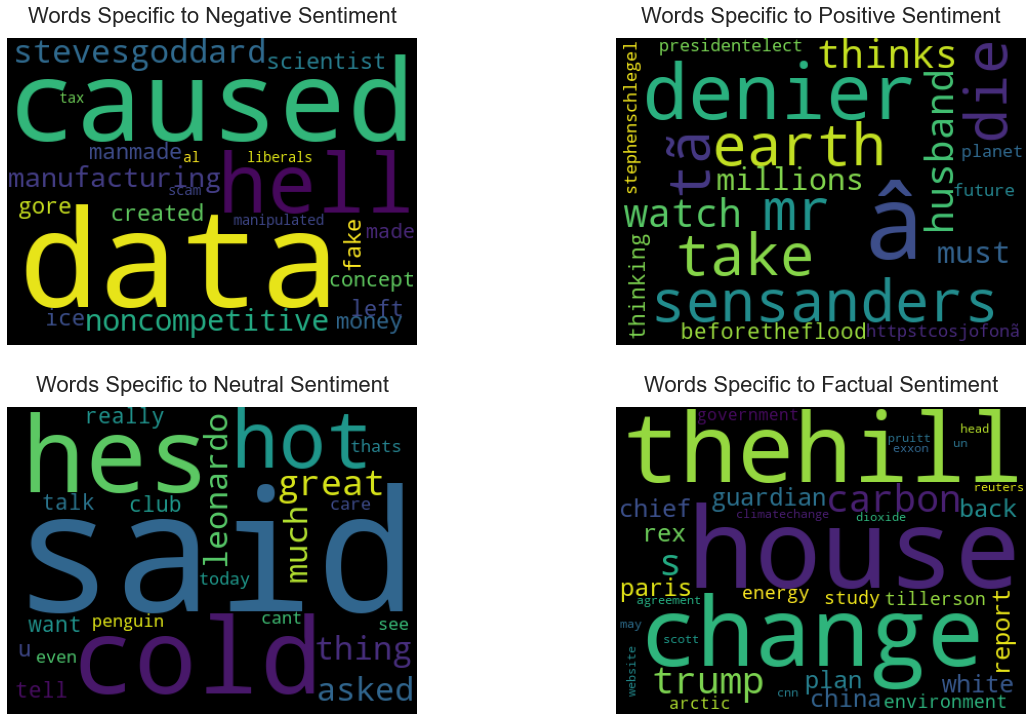

In [36]:
def word_cloud(data):
    # Create a variable to store the text
    text = " ".join(word for word in data)
    # Instantiate wordcloud object
    word_cloud = WordCloud(collocations =False,
                          background_color = 'black',
                          width=400, 
                          height=300, 
                          contour_width=2, 
                          contour_color='steelblue')
    # generate wordcloud images
    return word_cloud.generate(text)


# Store each variable and their header names in a list
data = [(Negative,'Negative'),(Positive,'Positive'),(Neutral,'Neutral'),(Factual,'Factual')]
size = len(data)
fig = plt.figure(figsize=(20,20 * size // 3))
# Create Plot using the Variables
for index, var in enumerate(data):
    ax = fig.add_subplot(size, 2, index + 1)
    wordcloud = word_cloud(var[0]) # false implies least frequent n_words
    ax.imshow(wordcloud)
    plt.title('Words Specific to {} Sentiment'.format(var[1]), size = 22, pad =15)
    ax.axis('off')


So far we've taken a look at what the most frequent words are per sentiment and have seen how factual comments differ from other comments.

**Note**, our data is still a bit noisy because we haven't taken care of the urls in each post yet and there's a lot of non-english words. But this gives us an idea.

**How many links are there in total? and How are they shared amongst the sentiments?**

In [127]:
# how many links there are
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
urls = []
for row in df['message']:
    match = re.findall(pattern_url, row)
    for item in match:
        urls.append(item)

total_links = len(urls)
print(total_links)

9673


Here we see that there are __9,673__ url links in the dataset.

In [128]:
# Number of links per sentiment
# copy dataframe to not change structure of main df
df_copy = df.copy()

# create new column `url
url = []

# find urls per row 
for row in df_copy['message']:
    match = re.findall(pattern_url, row)
    url.append(len(match)) # append the number of urls found per row
    
df_copy['url'] = url

df_copy.head()

sentiment                                            message  tweetid  url
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221    1
1          1  It's not like we lack evidence of anthropogeni...   126103    0
2          2  RT @RawStory: Researchers say we have three ye...   698562    2
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736    1
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954    0

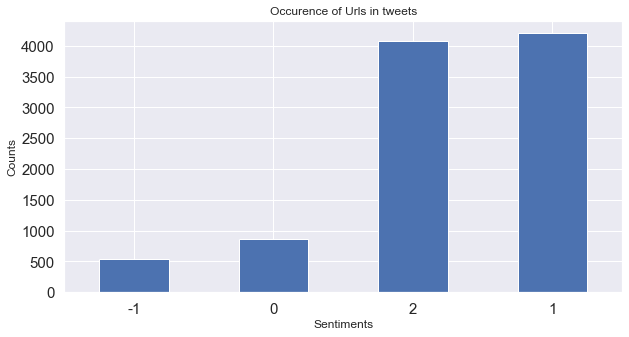

In [129]:
grouped = df_copy.groupby('sentiment')[['url']].sum().sort_values(by = 'url')
grouped.plot(kind ='bar',figsize=(10,5),
             fontsize = 15,
             title = 'Occurence of Urls in tweets',
             legend = False, xlabel = 'Sentiments',
             ylabel = 'Counts', rot = 'horizontal');

Again, _positive_ and _factual_ comments lead the way, indicating that there may be more to gain from these urls, particularly in the case of the _factual_ comments which has more **urls** than it does **data points** (__4,070 :__ __3640__). This is by no means conclusive. 

Perhaps the model will tell us more eventually.

### Twitter Handles

A Twitter handle is the username that appears at the end of a unique Twitter URL. Twitter handles appear after the @ sign in the profile URL and it must be unique to a user account. A Twitter name, on the other hand, is simply there to help people find the company they’re looking for.

Let's see if we can get any information from the twitter handles in our data.

In [130]:
# Creating a function to extract handles from tweets
def extract_handles(x):
    handles = []
    for i in x:
        h = re.findall(r'@(\w+)', i)
        handles.append(h)
        
    return handles

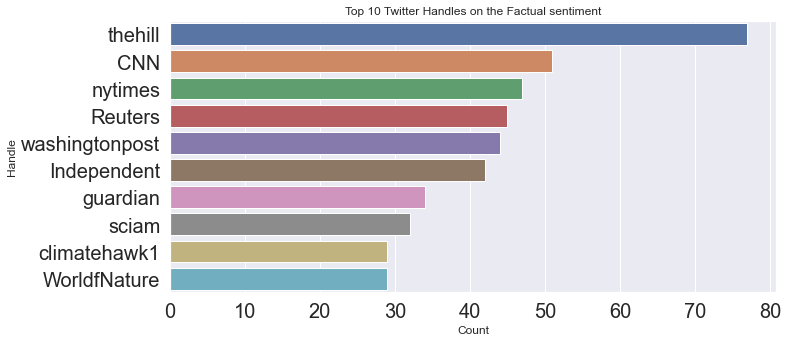

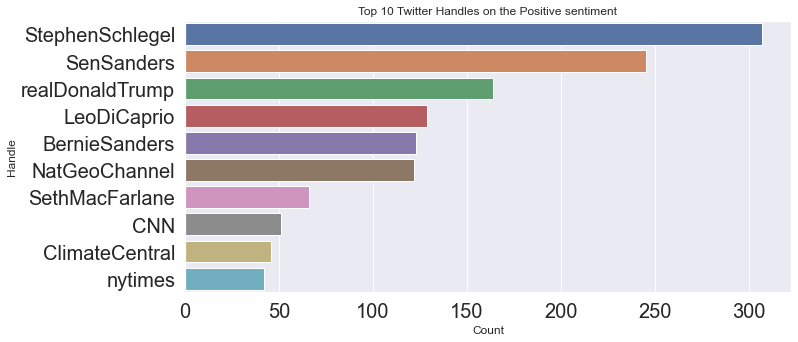

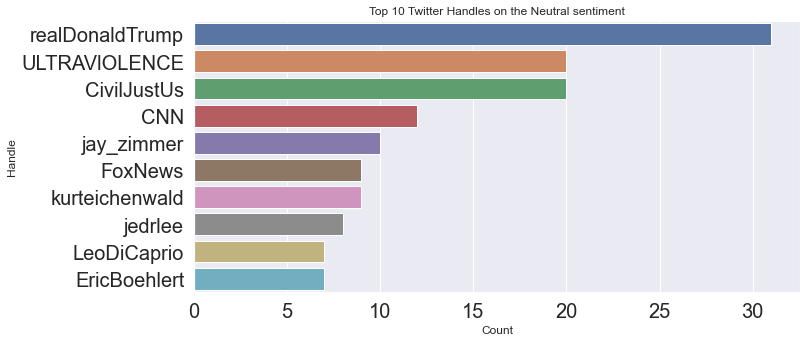

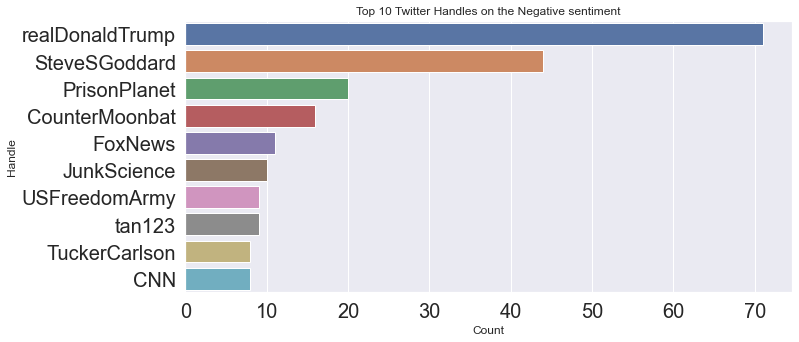

In [147]:
Factual = extract_handles(df_copy['message']
                              [df_copy['sentiment'] == 2])
Positive = extract_handles(df_copy['message']
                          [df_copy['sentiment'] == 1])
Neutral = extract_handles(df_copy['message']
                              [df_copy['sentiment'] == 0])
Negative = extract_handles(df_copy['message']
                          [df_copy['sentiment'] == -1])

# handle lists 
handles = [sum(Factual, []), sum(Positive, []), sum(Neutral, []),
           sum(Negative, [])]

# Visualising the Handles
full_title = ['Top 10 Twitter Handles on the Factual sentiment',
              'Top 10 Twitter Handles on the Positive sentiment',
              'Top 10 Twitter Handles on the Neutral sentiment',
              'Top 10 Twitter Handles on the Negative sentiment']

plt.rcParams['figure.figsize'] = [50, 5]

for i, sent in enumerate(handles):
    plt.subplot(1, 4, i + 1)
    freq_dist = nltk.FreqDist(sent)
    plot_df = pd.DataFrame({'Handle': list(freq_dist.keys()),
                      'Count' : list(freq_dist.values())})

    plot_df = plot_df.nlargest(columns='Count', n=10)

    ax = sns.barplot(data=plot_df, y='Handle', x='Count')
    plt.title(full_title[i])
    plt.yticks(size =20)
    plt.xticks(size =20)
    plt.show()

From the above visuals we can see that:
- The factual handles are real life News outlets
- Donald Trump is a leading voice in Neutral and Negative sentiments
- Politicians and celebrities take the biggest chunck of the positive sentiment
    

### Hashtags

On Twitter, adding a “#” to the beginning of an unbroken word or phrase creates a hashtag. When you use a hashtag in a Tweet, it becomes linked to all of the other Tweets that include it.People use the hashtag symbol (#) before a relevant keyword or phrase in their Tweet to categorize those Tweets and help them show more easily in Twitter search. Clicking or tapping on a hashtagged word in any message shows you other Tweets that include that hashtag. Hashtags can be included anywhere in a Tweet.

Let's look at what the hashtags in our data will tell us.

In [148]:
# Function to extract hashtags from the tweets

def extract_hashtags(x):
    hashtags = []
    for i in x:
        ht = re.findall(r'#(\w+)', i)
        hashtags.append(ht)
        
    return hashtags

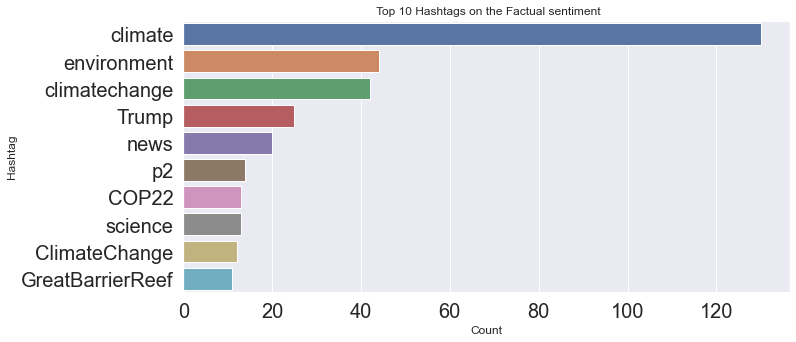

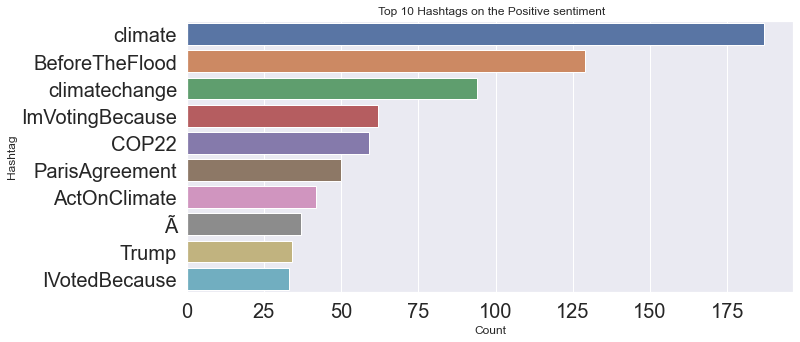

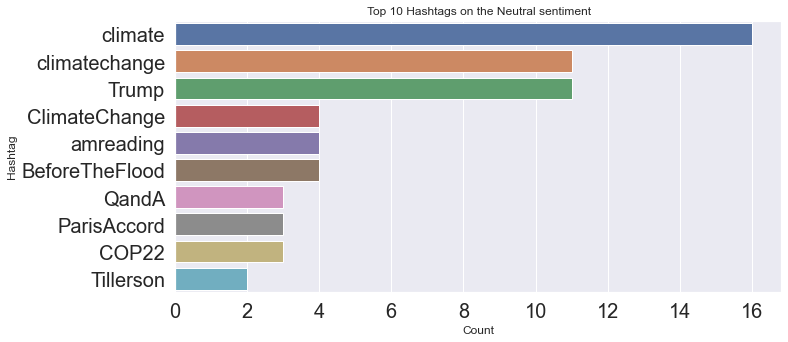

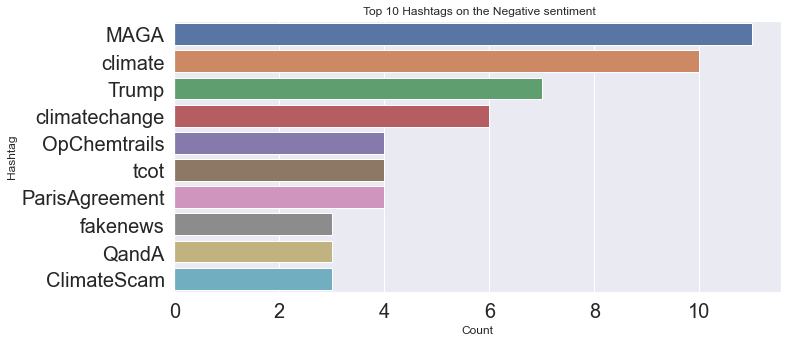

In [150]:
# Extracting hashtags from tweets
Factual = extract_hashtags(df_copy['message']
                              [df_copy['sentiment'] == 2])
Positive = extract_hashtags(df_copy['message']
                          [df_copy['sentiment'] == 1])
Neutral = extract_hashtags(df_copy['message']
                              [df_copy['sentiment'] == 0])
Negative = extract_hashtags(df_copy['message']
                          [df_copy['sentiment'] == -1])

# List of hashtags
hashtags = [sum(Factual, []), sum(Positive, []),
            sum(Neutral, []),sum(Negative, [])]

# Visualising the Hashtags
ht_titles = [' Top 10 Hashtags on the Factual sentiment',
              ' Top 10 Hashtags on the Positive sentiment',
              ' Top 10 Hashtags on the Neutral sentiment',
              ' Top 10 Hashtags on the Negative sentiment']

plt.rcParams['figure.figsize'] = [50, 5]

for i, sent in enumerate(hashtags):
    plt.subplot(1, 4, i + 1)
    freq_dist = nltk.FreqDist(sent)
    plot_df = pd.DataFrame({'Hashtag': list(freq_dist.keys()),
                      'Count' : list(freq_dist.values())})

    plot_df = plot_df.nlargest(columns='Count', n=10)

    ax = sns.barplot(data=plot_df, y='Hashtag', x='Count')
    plt.title(ht_titles[i])
    plt.yticks(size =20)
    plt.xticks(size =20)
    plt.show()

<a id="four"></a>
## 5. Data Engineering


In this section it's where we apply all the insights gained from the EDA to structure the data and prepare it for modelling. We would be cleaning the data, removing non text characters that could affect a model and also apply some transformations on the text to remove contractions and punctuations.

We will write a function to clean up our data to remove the noise that could affect our model's perfomance when we finally get there. In this next step we will:

 - Remove punctuations
 
 - Remove hashtags
 
 - Remove twitter handles
 
 - Remove urls
 
 - Remove non-english words
 
 - Remove emojis
 
 - Remove white spaces. 

 - Tokenize The Data

In [44]:
#Removing the contractions for both the train and Train DataFrames
#Remove contractions on Train Dataset
df_copy['message'] = df_copy['message'].apply(lambda x: [contractions.fix(word) for word in x.split()])
df_copy['message'] = [' '.join(map(str, l)) for l in df_copy['message']]

#Remove Contractions on Test Dataset
df_test['message'] = df_test['message'].apply(lambda x: [contractions.fix(word) for word in x.split()])
df_test['message'] = [' '.join(map(str, l)) for l in df_test['message']]

df_copy.head()

sentiment                                            message  tweetid  url
0          1  PolySciMajor EPA chief does not think carbon d...   625221    1
1          1  It is not like we lack evidence of anthropogen...   126103    0
2          2  RT @RawStory: Researchers say we have three ye...   698562    2
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736    1
4          1  RT @SoyNovioDeTodas: It is 2016, and a racist,...   466954    0

In [151]:
# Function to clean the data
def clean_data (tweet):
    """    
    Input is datatype 'str': tweet (noisy tweet)
    
    Output is datatype 'str': tweet (cleaned tweet)
    """
    #Convert each emoji to text
    tweet = emoji.demojize(tweet)
    #convert to lowercase
    tweet = tweet.lower()
    #remove punctuation
    tweet = re.sub(r"[,.;':@#?!\&/$]+\ *", ' ', tweet)
    #remove hashtags
    tweet = re.sub(r'#\w*','', tweet)
    #remove mentions 
    tweet = re.sub('@[\w]*','',tweet)
    #remove urls
    tweet = re.split('https:\/\/.*', str(tweet))[0]
    #remove emojis 
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emojis
        u"\U0001F300-\U0001F5FF"  # symbols 
        u"\U0001F680-\U0001F6FF"  # maps
        u"\U0001F1E0-\U0001F1FF"  # flags
                           "]+", flags = re.UNICODE)
    tweet = regrex_pattern.sub(r'', tweet)    
    #remove numbers 
    tweet = re.sub(r'\d+','', tweet)    
    #remove acsii
    tweet = unicodedata.normalize('NFKD', tweet).encode('ascii', 'ignore').decode('utf-8')
    #remove extra whitespaces 
    tweet = re.sub(r'\s\s+', ' ', tweet)
    #remove space in front of tweet
    tweet = tweet.lstrip(' ')
    return tweet

In [152]:
# Function to replace weblinks with text web_url
def handle_weblinks(text):
    import re
    pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
    match = re.findall(pattern_url, text)
    
    for sub in match:
        text = re.sub(pattern_url, 'web_url', text)
    return text.strip().lower()

In [153]:
# apply url handler function on train and test dataframe
df_copy['message'] = df_copy['message'].apply(handle_weblinks)
df_test['message'] = df_test['message'].apply(handle_weblinks)                                    

We now pass our train and test dataframes through the clean_data function.

In [154]:
# apply clean data function on train and test dataframe
df_copy['message'] = df_copy['message'].apply(clean_data) #train data
df_test['message'] = df_test['message'].apply(clean_data) #test data

In [155]:
# view first five rows of the cleaned datarame
df_copy.head()

sentiment                                            message  tweetid  url
0          1  polyscimajor epa chief doesn t think carbon di...   625221    1
1          1  it s not like we lack evidence of anthropogeni...   126103    0
2          2  rt rawstory researchers say we have three year...   698562    2
3          1  todayinmaker wired was a pivotal year in the w...   573736    1
4          1  rt soynoviodetodas it s and a racist sexist cl...   466954    0

### Analysing our data after cleaning up

Here we perform a wordcloud plot of our data to see the word occurence in the newly cleaned dataframe.

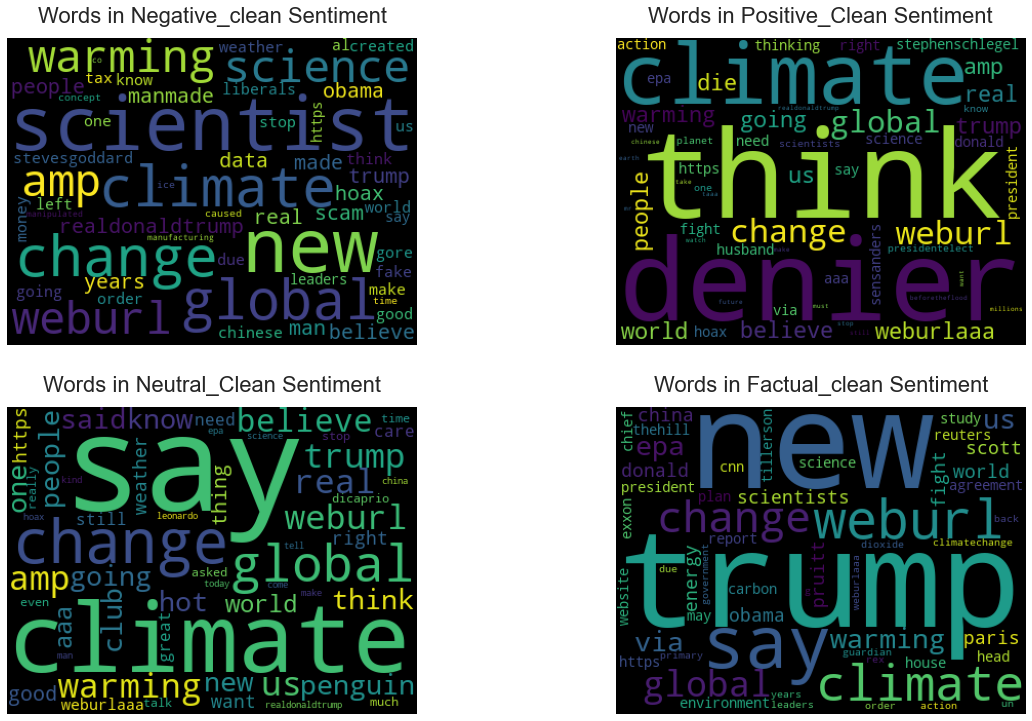

In [50]:
positives = df_copy['message'][df_copy['sentiment'] == 1]
negatives = df_copy['message'][df_copy['sentiment'] == -1]
neutrals = df_copy['message'][df_copy['sentiment'] == 0]
factuals = df_copy['message'][df_copy['sentiment'] == 2]

pos_clean = words_freq(positives, 60)
neg_clean = words_freq(negatives, 60)
neu_clean = words_freq(neutrals, 60)
fact_clean = words_freq(factuals, 60)


# Store each variable and their header names in a list
data = [(neg_clean,'Negative_clean'),(pos_clean,'Positive_Clean'),(neu_clean,'Neutral_Clean'),(fact_clean,'Factual_clean')]
size = len(data)
fig = plt.figure(figsize=(20,20 * size // 3))
# Create Plot using the Variables
for index, var in enumerate(data):
    ax = fig.add_subplot(size, 2, index + 1)
    wordcloud = word_cloud(var[0]) # false implies least frequent n_words
    ax.imshow(wordcloud)
    plt.title('Words in {} Sentiment'.format(var[1]), size = 22, pad =15)
    ax.axis('off')


## Tokenize Text Data

Tokenization is the most primary step in any natural language processing model because machines cannot comprehend the language as it is, it must be transformed to numbers, which is where tokenization comes in handy. Tokenization is the process of breaking down sentences into words.

This appears straightforward, but there are a few drawbacks, mostly because we want to map each token to a number, and the size and meaning of the resulting mapping is vital for Machine Learning tasks.

There are a few tokenizers available, but for this program, we will be making use of the `TreebankWordTokenizer()`

In [156]:
# Define function to help tokenize the data
def tokenize(text):
    tokenizer = TreebankWordTokenizer()
    
    return tokenizer.tokenize(text)

In [157]:
# df_copy = df.copy()

In [158]:
df_copy['message'] = df_copy['message'].apply(tokenize)
df_test['message'] = df_test['message'].apply(tokenize)

In [159]:
# View the first five rows of tokenized data
df_copy.head()

sentiment                                            message  tweetid  url
0          1  [polyscimajor, epa, chief, doesn, t, think, ca...   625221    1
1          1  [it, s, not, like, we, lack, evidence, of, ant...   126103    0
2          2  [rt, rawstory, researchers, say, we, have, thr...   698562    2
3          1  [todayinmaker, wired, was, a, pivotal, year, i...   573736    1
4          1  [rt, soynoviodetodas, it, s, and, a, racist, s...   466954    0

## Transform data(by stemming or lemmatizing)

**Stemming** is the process of stripping a word of its suffix and reducing it to its underlying term.

For example: “Flying” is a word and its suffix is “ing”, if we remove “ing” from “Flying” then we will get base word or root word which is “Fly”. Read more about stemming [here](https://medium.com/@tusharsri/nlp-a-quick-guide-to-stemming-60f1ca5db49e#:~:text=NLP%3A%20A%20quick%20guide%20to%20Stemming%201%20OverStemming.,...%205%20Lancaster%20Stemmmer.%20...%206%20Conclusion.%20)

**Lemmatization** is not very different from **stemming** in that we are trying to reduce a given term to its root word in both stemming and lemmatization. In Natural Language Processing (NLP) and machine learning in general, lemmatization is one of the most used text pre-processing techniques. In the stemming process, the root word is termed a stem, and in the lemmatization process, it is called a lemma.

#### How do they differ?

In stemming, a portion of the word is simply sliced off at the end. Different methods are employed to determine how many letters must be removed, however the algorithms do not understand the meaning of the word in the language it belongs to. The algorithms in lemmatization, on the other hand, have this knowledge. In fact, you could argue that these algorithms consult a dictionary to figure out what a word means before reducing it to its root word, or lemma.
As a result, a lemmatization algorithm would recognize that **better** is derived from good, and hence the lemme is **good**.

A stemming algorithm, on the other hand, would be unable to do so. Over-stemming or under-stemming may occur, and the term **better** may be shortened to **bet** or **bett**, or simply **preserved as better**. However, there is no way to reduce it to its underlying word excellent by stemming. This is the main distinction between stemming and lemmatization.

In [160]:
# Function to help out with either of stemming or lemmatization
def transform(text_list, method='lemma'):
    lemmatizer = WordNetLemmatizer()
    stemmer = PorterStemmer()
    words = []
    if method == 'lemma':
        for word, tag in pos_tag(text_list):
            word_tag = tag[0].lower()
            word_tag = word_tag if word_tag in ['a', 'r', 'n', 'v'] else None
            if not word_tag:
                lemma = word
            else:
                lemma = lemmatizer.lemmatize(word, word_tag)
            
            words.append(lemma)

    elif method == 'stem':
        for word in text_list:
            stem = stemmer.stem(word)
            words.append(stem)
            
    else:
        return(f"ERROR: '{method}' is an unknown transformation method use 'stem' or 'lemma'")

    return words

In [161]:
df_copy['message'] = df_copy['message'].apply(transform, method='lemma')
df_test['message'] = df_test['message'].apply(transform, method='lemma')

- [X] Transform data(by stemming or lemmatizing)

# Vectorization

Vectorization is a technical term for a classical approach of turning raw data (text) into vectors of real numbers, which is the format supported by machine learning models. This method has been around since the dawn of computing, has proven to be effective in a variety of fields, and is currently being employed in NLP.

Vectorization is a phase in feature extraction in Machine Learning. By translating text to numerical vectors, the goal is to extract some identifiable features from the text for the model to learn from.

There are a few vectorization techniques, we will look at 2 of the most popular methods;

1. Bag-of-words; which is practically a CountVectorizer.
2. TF-IDF Vectorization

#### Bag-of-words (Count Vectorizer)

Bag of words is a Natural Language Processing technique of text modelling. In technical terms, we can call it a method for extracting features from text data. This method of extracting features from documents is easy and adaptable.
A bag of words is a text representation that describes the frequency with which words appear in a document. We only keep track of word counts and don't pay attention to grammatical subtleties or word arrangement. Because any information about the sequence or structure of words in the document is deleted, it is referred to as a "bag" of words. The model simply cares about whether or not recognized terms appear in the document, not where they appear. [read more](https://www.mygreatlearning.com/blog/bag-of-words/)

#### TF-IDF

Term Frequency–Inverse Document Frequency, or TF-IDF, is a numerical statistic that measures how essential a word is in a document. It's not as naive as Bag of Words, but it's another frequency-based strategy.

## Vectorization without resampling

**Recall:** that presently our data is still in its **imbalanced** form, meaning all the sentiment types are not equally represented.

Now we will like to Vectorize out dataset in its imbalanced form, then in its balanced form.

In the mean time, let's refresh our memory on what our imbalanced data looks like

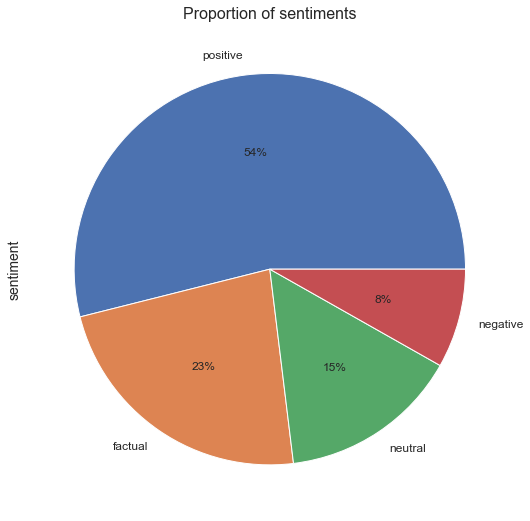

In [56]:
plot_series(df_copy.sentiment.value_counts(), name='sentiment')

Let's go ahead and Vectorize

### Split Data

Here we split the dataset into target (x) and label (y), we would also further split the data into train and test set

In [162]:
X = df_copy.message
y = df_copy.sentiment

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=SEED)

In [164]:
# Create a function that vectorizes the data via either tfidf or countvectorization
# This function only fits the data to the vectorizer object, the actual tranformation would be performed manualy
def vectorize(data, method='tfidf'):
    data = [' '.join(x) for x in data]
    
    if method == 'tfidf':
        vector = TfidfVectorizer(lowercase=True, analyzer='word', ngram_range=(1, 1))
        vector.fit(data)
    else:
        vector = CountVectorizer(lowercase=True, analyzer='word', ngram_range=(1, 1))
        vector.fit(data)
    return vector

### Vectorization with **CountVectorizer**

In [165]:
# Fit train data to vectorizer object
cv_vector = vectorize(X_train, method='cv')

In [166]:
# Here we transform the train and test data from the split
X_train_cv = cv_vector.transform([' '.join(x) for x in X_train])
X_test_cv = cv_vector.transform([' '.join(x) for x in X_test])

print(X_train_cv.shape, X_test_cv.shape)

(12655, 18102) (3164, 18102)


### Vectorization with **TFIDFVectorizer**

In [167]:
# Fit train data to tfidf_vectorizer object
tfidf_vector = vectorize(X_train, method='tfidf')

In [168]:
# Here we transform the train and test data from the split
X_train_tfidf = tfidf_vector.transform([' '.join(x) for x in X_train])
X_test_tfidf = tfidf_vector.transform([' '.join(x) for x in X_test])

print(X_train_tfidf.shape, X_test_tfidf.shape)

(12655, 18102) (3164, 18102)


## Handling Class Imbalance

Imbalanced data refers to datasets in which the target class has an unequal distribution of observations, i.e. one class label has a large number of observations while the other has a small sample.

Because most machine learning algorithms for classification were created with the assumption of an equal number of samples for each class, imbalanced classifications provide a difficulty for predictive modeling. As a result, models with poor prediction accuracy, particularly for the minority class, emerge.

To deal with this problem, we use a concept called `resampling`

## Vectorization with sampling

Resampling is a technique that involves taking multiple samples from the same set of data. It's a nonparametric approach of statistical inference, which means that it doesn't rely on generic distribution tables (such as normal distribution tables) to calculate estimated p probability values. Despite the benefits of balancing classes, these methods are not without flaws.

There are three types of resampling widely used:
 - **Under-sampling:**
     involves picking samples from the majority class at random and removing them from the training dataset. The majority class instances are removed at random until a more balanced distribution is attained in the random under-sampling method.
 - **Over-sampling:**
     requires replicating minority class instances at random and adding them to the training dataset.
 - **Hybrid:**
     this essentially combines both under-sampling and over-sampling to meet at a mid-way point

<img src="https://static-01.hindawi.com/articles/complexity/volume-2019/8460934/figures/8460934.fig.001.svgz" alt="drawing" width="800"/>


We will create a handy function that will enable us carry out the different sampling techniques as we see fit

In [169]:
# function to help with data resampling
def resampler(X_train, y_train, kind='oversample'):
    from imblearn.over_sampling import ADASYN
    from imblearn.under_sampling import RandomUnderSampler
    
    if kind == 'undersample':
        sampler = RandomUnderSampler(random_state=SEED)
    elif kind == 'oversample':
        sampler = ADASYN(random_state=SEED)
    else:
        print("Unrecognised sampling technique")
        
    X_train_res, y_train_res = sampler.fit_resample(X_train, y_train)
    
    return X_train_res, y_train_res

In [188]:
# Function to plot resampled data
def sampling_plot_check(y1, y2):
    y1_dict = {}
    y2_dict = {}
    
    for xx in y1:
        if xx in y1_dict:
            y1_dict[xx] += 1
        else:
            y1_dict[xx] = 1
    
    for yy in y2:
        if yy in y2_dict:
            y2_dict[yy] += 1
        else:
            y2_dict[yy] = 1
            
    y1_series = pd.Series(y1_dict)
    y2_series = pd.Series(y2_dict)
    y1_series.plot(kind='bar', alpha=.7, figsize=(9, 6))
    y2_series.plot(kind='bar',alpha=.5, figsize=(9, 6))
    plt.xticks(rotation=0)
    #plt.style.use('seaborn-flare-palette')
    plt.show()

## Undersampling the data

In [200]:
# countvectorizer
X_train_cv_under, y_train_cv_under = resampler(X_train_cv, y_train, kind='undersample')

In [201]:
# tfidfvectorizer
X_train_tfidf_under, y_train_tfidf_under = resampler(X_train_tfidf, y_train, kind='undersample')

Let's plot and see what we have

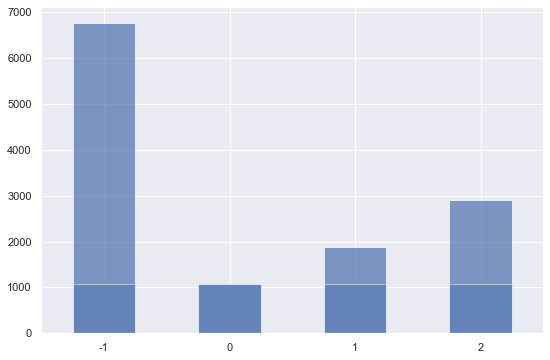

In [190]:
sampling_plot_check(y_train, y_train_cv_under)

### Next, we attempt over-sampling

In [198]:
# countvectorizer
X_train_cv_over, y_train_cv_over = resampler(X_train_cv, y_train, kind='oversample')

In [199]:
# tfidfvectorizer
X_train_tfidf_over, y_train_tfidf_over = resampler(X_train_tfidf, y_train, kind='oversample')

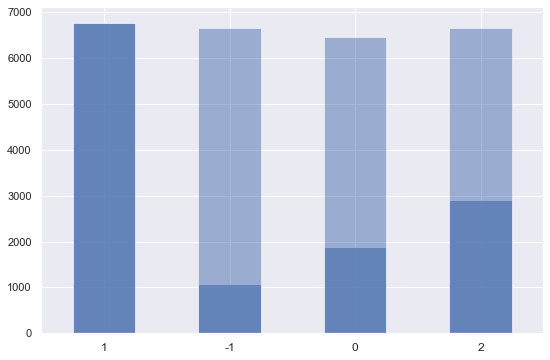

In [73]:
sampling_plot_check(y_train, y_train_cv_over)

<a id="four"></a>
## 5. Modelling


For the modelling phase, we want to try out several models on the different datasets. to do this, we would define a function that takes a train data and train label and returns a fitted model. 

The following models would be tried out;

**1. Logistic Regression**

**2. Random Forest**

**3. Multinomial Naive Bayes**

**4. Gaussian Naive Bayes**

**5. Support Vector Classifier**

All the models would be trained using a constant random state value

In [205]:
def make_models(split, model_list, vectorizer_type='cv'):
    import warnings
    warnings.filterwarnings('ignore')
    f1_scores = []
    model_name = []
    for model in model_list:
        if model == 'logistic_reg':
            modeller = LogisticRegression(multi_class='ovr', random_state=SEED)
        elif model == 'random_forest':
            modeller = RandomForestClassifier(random_state=SEED)
        elif model == 'support_vector':
            modeller = SVC(random_state=SEED)
        elif model == 'naive_bayes':
            if vectorizer_type == 'cv':
                print(f'using MultinomialNB') 
                modeller = MultinomialNB()
            elif vectorizer_type == 'tfidf':
                print(f'using GaussianNB')
                modeller = GaussianNB()
                
        else:
            print("unknown classifier")
        
        import time
        start = time.perf_counter()
        X_train, X_test, y_train, y_test = split
        
        try:
            modeller.fit(X_train, y_train)
        except TypeError:
            print("Unable to use gaussianNB")
            continue
            
        y_pred = modeller.predict(X_test)

        f_score = f1_score(y_test, y_pred, average='weighted')
        cm = confusion_matrix(y_test, y_pred, labels=modeller.classes_)
        print(f'f1_score for {model} is : {f_score} \n\t\t')
        print(f"it took {time.perf_counter() - start} secs for {model} to run.\n\n")
        f1_scores.append(f_score)
        model_name.append(model)

    plot_df = pd.DataFrame({'Models':model_name,
                            'F1_Score': f1_scores})
    
    plot_df = plot_df.set_index('Models').sort_values(by = 'F1_Score')
    plot_df.plot(kind ='bar',figsize=(10,5),
             fontsize = 15, colormap ='Purples_r',
             title = 'F1_scores of Models',
             legend = False, xlabel = 'Model Name',
             rot = 'horizontal');

# Imbalanced Data Modelling

**1. CountVectorizer**

f1_score for logistic_reg is : 0.7508801162925111 
		
it took 2.840304899997136 secs for logistic_reg to run.


using MultinomialNB
f1_score for naive_bayes is : 0.6911462921067979 
		
it took 0.01578439999866532 secs for naive_bayes to run.


f1_score for random_forest is : 0.7063614331546009 
		
it took 25.14366250000603 secs for random_forest to run.


f1_score for support_vector is : 0.7212446619579926 
		
it took 50.8435129999998 secs for support_vector to run.


unknown classifier
f1_score for gaussian_bayes is : 0.7212446619579926 
		
it took 47.33478550000291 secs for gaussian_bayes to run.




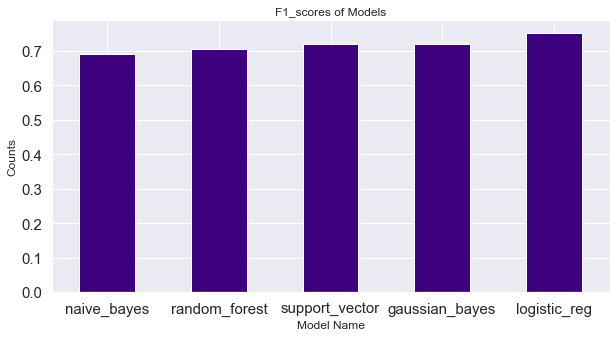

In [204]:
split_data = (X_train_cv, X_test_cv,  y_train, y_test)
list_models = ['logistic_reg', 'naive_bayes','random_forest','support_vector','gaussian_bayes']
make_models(split_data, list_models)

For the evaluation of the models we have opted to use the **f1_score** instead of **accuracy, precision, or recall**, this is because we want a good balance between prediction of a **negative tweet**, a **positive tweet**, a **neutral tweet** or even a **factual tweet**. The accuracy of the model is especially a poor choice of metric to use in this case due to the unbalance in the dataset, the **precision** score which is also known as the predicted positive rate measure only how many of the classes were predicted correctly and pays less attention to the misclassified class, while the recall which is the true positive rate measures the amount of the positive class predicted. The **f1_score** hence is the best choice of metric as it takes into account the harmonic mean of the **precision** and **recall** scores.

from the results obtained from the models, we could see that the logistic regression model had the best performance on the unbalanced dataset with an **f1_score** of **0.755** and is closely followed by the support vector classifier. but we could also observe that the other models did a fairly good job on the test data.

It is worthy of note to state that the logistic regression had less training time than the support vector classifier, this lesser training time would be more significant when the models are pushed into production as it would take more time for the svc to make predictions on a test data.


next we would apply the models using the tfidf vectorizer which gives a weighted average of the word counts as our word counter instead of the count vectorizer which gives just a raw word count of the tokenized data.

**2. Tfidf Vectorizer**

f1_score for logistic_reg is : 0.7508801162925111 
		
it took 3.124377000000095 secs for logistic_reg to run.


using GaussianNB
Unable to use gaussianNB
f1_score for random_forest is : 0.7063614331546009 
		
it took 26.80044110000017 secs for random_forest to run.


f1_score for support_vector is : 0.7212446619579926 
		
it took 60.09763789999852 secs for support_vector to run.


unknown classifier
f1_score for gaussian_bayes is : 0.7212446619579926 
		
it took 56.327380700000504 secs for gaussian_bayes to run.




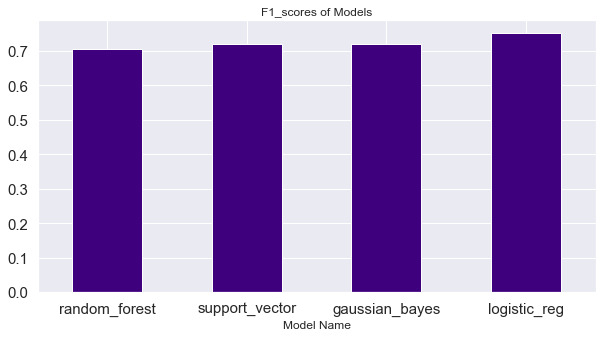

In [210]:
split_data = (X_train_cv, X_test_cv,  y_train, y_test)
list_models = ['logistic_reg', 'naive_bayes','random_forest','support_vector','gaussian_bayes']
make_models(split_data, list_models, vectorizer_type='tfidf')

The results shows that using a weigthed count instead of raw counts didn't have much effect on the unsampled data. this could be due so several reasons ranging from the actual distribution of words in the data.

Next let's try out the tfidf vectorizer and the countvectorizer on the different models but using an upsampled version of the dataset

# Resampled Data Modelling ( Oversampling)

**1. CountVectorizer**

f1_score for logistic_reg is : 0.7359103762329922 
		
it took 3.6872102999986964 secs for logistic_reg to run.


using MultinomialNB
f1_score for naive_bayes is : 0.7198939190950319 
		
it took 0.018996099999640137 secs for naive_bayes to run.


f1_score for random_forest is : 0.682037602598239 
		
it took 98.28022100000089 secs for random_forest to run.


f1_score for support_vector is : 0.7092452065575229 
		
it took 202.5117620999954 secs for support_vector to run.


unknown classifier
f1_score for gaussian_bayes is : 0.7092452065575229 
		
it took 202.64993269999832 secs for gaussian_bayes to run.




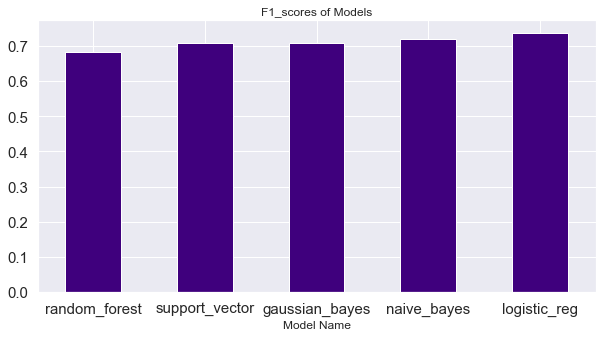

In [206]:
split_data = (X_train_cv_over, X_test_cv,  y_train_cv_over, y_test)
list_models = ['logistic_reg', 'naive_bayes','random_forest','support_vector','gaussian_bayes']
make_models(split_data, list_models)

for this phase we used a sampling rate of the size of the majority class, such that each class is sampled up to match the majority class (in this case class 1 of the tweet sentiments).

The highest **f1_score** observed here is **0.732** which was gotten by the **logistic regression**, this score is below the performance measured by the unbalanced dataset, it now begs the question was resampling the data really a good approach for our modelling prolem? before we decide on that let us try **downsampling** the data to the amount of observaations recorded in the minority class (the negative tweet sentiment), but first let us try out the **oversampled** data on the **tfidf vectrizer**. 

**2.TfidfVectorizer**

f1_score for logistic_reg is : 0.6088486669210882 
		
it took 3.917633500001102 secs for logistic_reg to run.


using GaussianNB
Unable to use gaussianNB
f1_score for random_forest is : 0.6834335151256379 
		
it took 54.69920560000173 secs for random_forest to run.


f1_score for support_vector is : 0.3972787758279014 
		
it took 313.855412900004 secs for support_vector to run.


unknown classifier
f1_score for gaussian_bayes is : 0.3972787758279014 
		
it took 298.60118859999784 secs for gaussian_bayes to run.




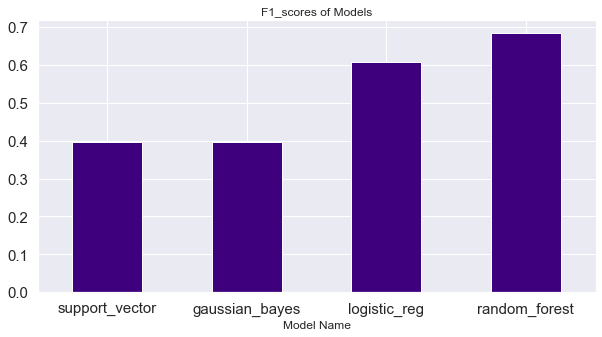

In [207]:
split_data = (X_train_tfidf_over, X_test_cv,  y_train_tfidf_over, y_test)
list_models = ['logistic_reg', 'naive_bayes','random_forest','support_vector','gaussian_bayes']
make_models(split_data, list_models, vectorizer_type='tfidf')

The **tfidf vectorizer** performed poorest on all the models on the **upsampled dataset**. We can attribute this to the fact that the **tfidf vectorizer** takes a weighted count of words and not a **raw word count**, from the upsampling of the dataset, words would be replicated several times for the minority classes so they cpuld reach the same amount as the majority class, this would lead to those words being assigned lesser weights as the **tfidf vectorizer** penalizes words that are two frequent in the overall document.

finally let us try out the downsampling method on the tfidf vectrizer and the count vectorizer

## Under Sampling

**1. CountVectorizer**

f1_score for logistic_reg is : 0.6650938044072751 
		
it took 2.4054637999943225 secs for logistic_reg to run.


using MultinomialNB
f1_score for naive_bayes is : 0.6612014034419099 
		
it took 0.017321799998171628 secs for naive_bayes to run.


f1_score for random_forest is : 0.5989024778005844 
		
it took 12.663652399998682 secs for random_forest to run.


f1_score for support_vector is : 0.6339604627916444 
		
it took 6.514069099997869 secs for support_vector to run.


unknown classifier
f1_score for gaussian_bayes is : 0.6339604627916444 
		
it took 7.334623200003989 secs for gaussian_bayes to run.




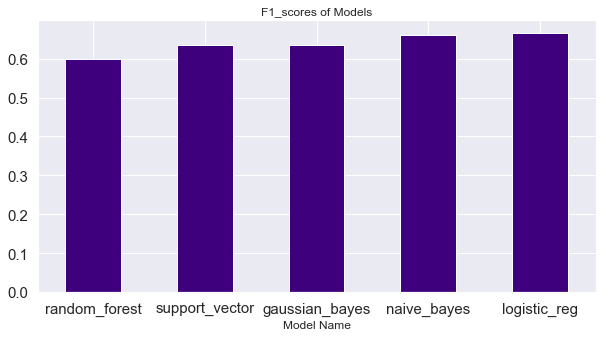

In [208]:
split_data = (X_train_cv_under, X_test_cv,  y_train_cv_under, y_test)
list_models = ['logistic_reg', 'naive_bayes','random_forest','support_vector','gaussian_bayes']
make_models(split_data, list_models)

**2. TfidfVectorizer**

f1_score for logistic_reg is : 0.6650938044072751 
		
it took 2.101022800001374 secs for logistic_reg to run.


using GaussianNB
Unable to use gaussianNB
f1_score for random_forest is : 0.5989024778005844 
		
it took 15.464159899995138 secs for random_forest to run.


f1_score for support_vector is : 0.6339604627916444 
		
it took 6.970336700003827 secs for support_vector to run.


unknown classifier
f1_score for gaussian_bayes is : 0.6339604627916444 
		
it took 7.873403600002348 secs for gaussian_bayes to run.




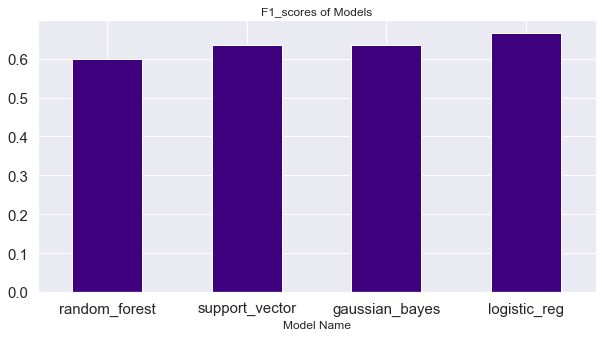

In [209]:
split_data = (X_train_cv_under, X_test_cv,  y_train_cv_under, y_test)
list_models = ['logistic_reg', 'naive_bayes','random_forest','support_vector','gaussian_bayes']
make_models(split_data, list_models, vectorizer_type='tfidf')

The **undersampled data** performed poorly of all the methods employed so far, the logistic regression model which had an **f1_score** of **0.755** and **0.732** from the unbalanced and upsampled data recorded an **f1_score** of **0.66** here for both the count vectorizer and the **tfidf vectorizer**.

One of the likeliest of reasons for this can be attributed to the fact that the model now has less data to learn from and that some valuable information might have been lost during the downsampling process.

Not withstanding this does not make the downsapling technique any less efficient or appropriate, what this shows us is that due to the large difference in the amount of data in the majority and minority classes, employing downsampling here using the minority class as the sample size would make us lose lots of data.

One method that we could have employed is sampling the minority classes up to half the majority class and simultaneously downsampling the majority classes to half the size of the max majority class.

## Selecting a Model

From all the results seen on all the different data subsets and models, it is evident that the **logistic regression** performed the best on all training sets. This makes selecting an optimal model simpler as the **logistic regression** is a very simple model to train and explain. One thing we need to consider also is the training time, having in mind that models that take longer to train would also take longer time to make predictions when it is fed unseen data. The logistic regression apart from being the best performing model also has the second best training time which was bested only by the Naive Bayes model which is also a simple model to train and explain.

We also observed that the **contvectorizer** did a more decent job than the **tfidf vectorizer**.

Having all these in mind we have opted to go with the logistic regression, we would be training a final **logistic regression** model on the unbalanced data set because it performed better than the re-sampled dataset, but this time we would be tweaking some of the **hyperparameters** from the logistic regression model and also the count vectorizer.

For the final training, we would use a package from **scikit_learn** known as **Pipeline** to fit the count vectorizer object and the logistic regresion model with just one fit statement. this makes it very easier for deploying the model as new and unseen data don't need to be first fitted to a saved count vectorizer object but fitted to the saved pipeline object to produce results.

## Training Chosen Model

In [211]:
cv = CountVectorizer(ngram_range=(1, 2))

# Create objects of LogisticRegression
lr = LogisticRegression(multi_class = 'ovr',  max_iter=5000, C = 3, random_state = SEED)

# Create pipeline object
pipe = Pipeline([('vectorizer', cv), ('lr',lr)])

X_train = [' '.join(x) for x in X_train]

# fit The pipeline
pipe.fit(X_train, y_train)

print("Training f1_score: {}".format(f1_score(pipe.predict(X_train), y_train,average = 'weighted')))

Training f1_score: 0.9986568759550466


In [212]:
# Evaluate the model on the test set
x_test = [' '.join(x) for x in X_test]
f1score = f1_score(y_test, pipe.predict(x_test), average ='weighted')
precision = precision_score(y_test, pipe.predict(x_test), average ='weighted')
recall = recall_score(y_test, pipe.predict(x_test), average ='weighted')

print("the f1score is: {}".format(f1score))
print("the precission is: {}".format(precision))
print("the recall is: {}".format(recall))

the f1score is: 0.7625894281383
the precission is: 0.7645001593158919
the recall is: 0.7718078381795196


<a id="six"></a>
## 7. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


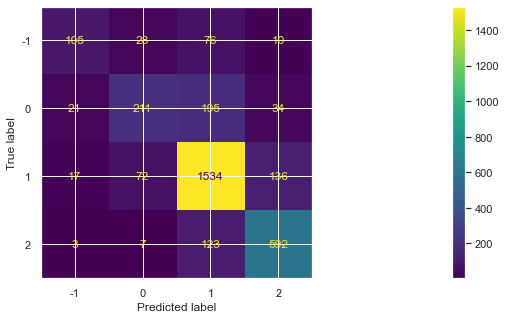

In [213]:
y_pred = pipe.predict(x_test)
print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred))

In [84]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       0.72      0.48      0.58       219
           0       0.64      0.45      0.53       461
           1       0.79      0.87      0.83      1759
           2       0.77      0.81      0.79       725

    accuracy                           0.77      3164
   macro avg       0.73      0.65      0.68      3164
weighted avg       0.76      0.77      0.76      3164



The classification report matrix shows the prediction metrics of the individual classes in the dataset, from the confusion matrix we could see the f1_score, the precision_score, the model's accuracy and the recall.

The recall score measures how much the mld recall the true values of the observation, looking at the report for each class label(-1,0,1,2) we can see that classes 1 and 2 has the highest recall scores of 0.87 and 0.81, while class -1 and 0 had recall scores of 0.45 and 0.48. This comes as no surprise as classes 1 and 2 had more observations in the train data, the model has seen them more times than the other classes and hence would predict them more accurately than the other classes.

The precision score is a measure of how precise the model is in predicting the positive class, i.e not looking at the misclassifications but rather for each class label when the model predicted them, how often was it correct?. Again we observe that classes 1 and 2 had higher precision scores than class -1 and 0 but the difference here is not as pronounced as in the recall score.

The f1_score which is the harmonic mean of the precision and recall score takes into account both the misclassifications and the corretly classified classes. a weighted average f1_score of 0.76 means that when the model is fed in data, 76% of the time it is going to predict the correct label, but would have some misclassifications 24% of the time.

These scores can e drastically improved by colllecting more data on the other minority classes as opposed to using upsampling techniques which generate syntetic data from the majority class.

<a id="seven"></a>
## 7. Kaggle Submission
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


In [ ]:
df_test.head()

message  tweetid
0  [europe, will, now, be, look, to, china, to, m...   169760
1  [combine, this, with, the, polling, of, staffe...    35326
2  [the, scary, unimpeachable, evidence, that, cl...   224985
3  [karoli, morgfair, osborneink, dailykos, putin...   476263
4  [rt, fakewillmoore, female, orgasm, because, g...   872928

In [ ]:
# select the tweet_id from the test datframe
submission = df_test[['tweetid']]

In [ ]:
#prepare the test data
test = [' '.join(i) for i in df_test.message]
# make prediction 
pred = pipe.predict(test)

In [ ]:
# assign prediction to submission variable
submission['sentiment'] = pred

In [ ]:
# view first five rows of submission
submission.head()

tweetid  sentiment
0   169760          2
1    35326          1
2   224985          1
3   476263          1
4   872928          0

In [ ]:
# save submission file to csv
submission.to_csv('logistic_regression.csv', index = False)

## Save model as a pickled file

In [ ]:
# name to store model as 
file_name = 'team3_log_reg.pkl'
# save model as a pickled object
with open(file_name, 'wb') as file:
    pickle.dump(pipe, file)

## Train Other Classifiers for Streamlit

Again for these models, we would use pipelines to train the models so we can have a consistent deployment framework inside of streamlit

**Random Forest**

In [103]:
X_train = [' '.join(x) for x in X_train]

In [87]:
rf = RandomForestClassifier(n_estimators = 200, random_state = SEED)
cv = CountVectorizer(ngram_range=(1, 2))
# Create pipeline object
forest_pipe = Pipeline([('vectorizer', cv), ('random_forest',rf)])
# fit The pipeline
forest_pipe.fit(X_train, y_train)
print("Training f1_score: {}".format(f1_score(forest_pipe.predict(X_train), y_train,average = 'weighted')))

Training f1_score: 0.9992099722418635


In [88]:
file_name = 'team3_rand_for.pkl'
# save model as a pickled object
with open(file_name, 'wb') as file:
    pickle.dump(forest_pipe, file)

**Naive Bayes**

In [104]:
nb = MultinomialNB(alpha = 0.5)
cv = CountVectorizer(ngram_range=(1, 2))
# Create pipeline object
bayes_pipe = Pipeline([('vectorizer', cv), ('naive bayes',nb)])
# fit The pipeline
bayes_pipe.fit(X_train, y_train)
print("Training f1_score: {}".format(f1_score(bayes_pipe.predict(X_train), y_train,average = 'weighted')))

Training f1_score: 0.9756141322642566


In [105]:
file_name = 'team3_naive_bayes.pkl'
# save model as a pickled object
with open(file_name, 'wb') as file:
    pickle.dump(bayes_pipe, file)

**Support Vector Classifier**

In [106]:
svc = SVC(C = 3)
cv = CountVectorizer(ngram_range=(1, 2))
# Create pipeline object
svc_pipe = Pipeline([('vectorizer', cv), ('support vector',svc)])
# fit The pipeline
svc_pipe.fit(X_train, y_train)
print("Training f1_score: {}".format(f1_score(svc_pipe.predict(X_train), y_train,average = 'weighted')))

Training f1_score: 0.9976305460063284


In [107]:
file_name = 'team3_svc.pkl'
# save model as a pickled object
with open(file_name, 'wb') as file:
    pickle.dump(svc_pipe, file)